<a href="https://colab.research.google.com/github/lamvu262/CPU-Scheduler/blob/master/otsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/images/noisyimg.jfif /content/temp/noisyimg.jfif

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2

In [ ]:
threshold_values = {}
h = [1]


def Hist(img):
   row, col = img.shape
   print(row, col) 
   y = np.zeros(256)
   for i in range(0,row):
      for j in range(0,col):
         y[img[i,j]] += 1
   x = np.arange(0,256)
   plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
   plt.show()
   return y


def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y


   
def countPixel(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
           cnt += h[i]
    return cnt


def wieght(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w


def mean(s, e):
    m = 0
    w = wieght(s, e)
    for i in range(s, e):
        m += h[i] * i
    
    return m/float(w)


def variance(s, e):
    v = 0
    m = mean(s, e)
    w = wieght(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v
            

def threshold(h):
    cnt = countPixel(h)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = wieght(0, i) / float(cnt)
        mb = mean(0, i)
        
        vf = variance(i, len(h))
        wf = wieght(i, len(h)) / float(cnt)
        mf = mean(i, len(h))
        
        V2w = wb * (vb) + wf * (vf)
        V2b = wb * wf * (mb - mf)**2
        
        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('Wb='+ str(wb) + "\n")
        fw.write('Mb='+ str(mb) + "\n")
        fw.write('Vb='+ str(vb) + "\n")
        
        fw.write('Wf='+ str(wf) + "\n")
        fw.write('Mf='+ str(mf) + "\n")
        fw.write('Vf='+ str(vf) + "\n")

        fw.write('within class variance='+ str(V2w) + "\n")
        fw.write('between class variance=' + str(V2b) + "\n")
        fw.write("\n")
        
        if not math.isnan(V2w):
            threshold_values[i] = V2w


def get_optimal_threshold():
  min_V2w = min(threshold_values.values())
  optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
  print('optimal threshold', optimal_threshold[0])
  return optimal_threshold[0]




In [ ]:
from google.colab.patches import cv2_imshow


In [ ]:
image = cv2.imread(/content/drive/MyDrive/images/noisyimg.jfif,0)
img = np.asarray(image)
h = Hist(img)
threshold(h)
op_thres = get_optimal_threshold()
res = regenerate_img(img, op_thres)
plt.imshow(res)
plt.savefig("otsu.jpg")

NameError: ignored

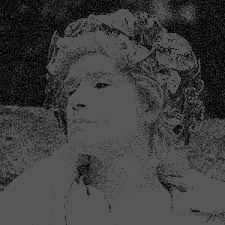

In [ ]:
thresh, temp = cv2.threshold(img, 87, 255, cv2.THRESH_TRUNC)

cv2_imshow(temp)

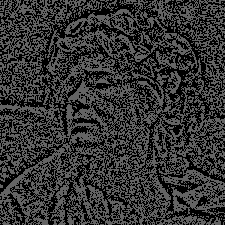

In [ ]:
temp= cv2.adaptiveThreshold(img,100,cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY,11,2)
cv2_imshow(temp)